In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Load the dataset
file_path = r"C:\Users\ENVY\Desktop\new_gesture\dataset.csv"
data = pd.read_csv(file_path, header=None)

In [3]:
# Separate features (landmarks) and labels
X = data.iloc[:, :-1].values  # All columns except the last one
y = data.iloc[:, -1].values   # The last column contains labels

# Convert labels to categorical (one-hot encoding)
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

print(f"Shape of features: {X.shape}")
print(f"Shape of labels: {y_categorical.shape}")
print(f"Classes: {label_encoder.classes_}")


Shape of features: (2500, 63)
Shape of labels: (2500, 5)
Classes: ['OK' 'PALM_IN' 'PALM_OUT' 'THUMBS_DOWN' 'THUMB_UP']


In [4]:
# Normalizing the X values (landmarks)
X = X / np.max(X)  # Scale all values between 0 and 1


In [5]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}, Testing data shape: {X_test.shape}")


Training data shape: (2000, 63), Testing data shape: (500, 63)


In [6]:

# Define the model
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Define the input shape explicitly here
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(y_train.shape[1], activation='softmax')  # Number of output classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,773 (65.52 KB)

 Trainable params: 16,773 (65.52 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=32
)


Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3116 - loss: 1.5716 - val_accuracy: 0.6700 - val_loss: 1.3172
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6088 - loss: 1.2131 - val_accuracy: 0.9440 - val_loss: 0.7703
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8386 - loss: 0.7507 - val_accuracy: 0.9680 - val_loss: 0.3784
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9124 - loss: 0.4168 - val_accuracy: 0.9820 - val_loss: 0.2035
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9455 - loss: 0.2660 - val_accuracy: 0.9860 - val_loss: 0.1259
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9675 - loss: 0.1761 - val_accuracy: 0.9860 - val_loss: 0.0923
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9695 - loss: 0.1398 - val_accuracy: 0.9860 - val_loss: 0.0661
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9714 - loss: 0.1178 - val_accuracy: 0.9860 - val_loss:

In [8]:
# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9884 - loss: 0.0211 
Test Accuracy: 98.60%


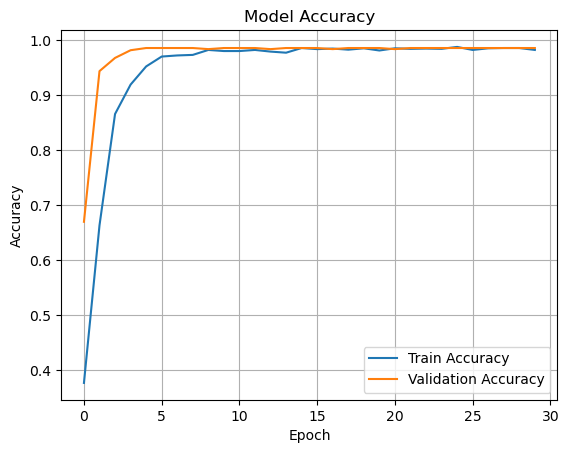

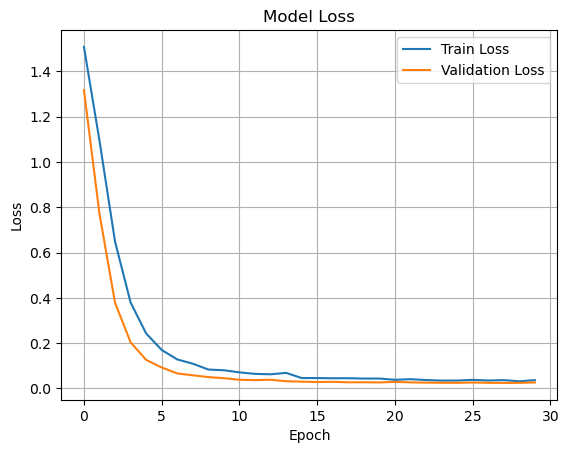

In [9]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()




16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


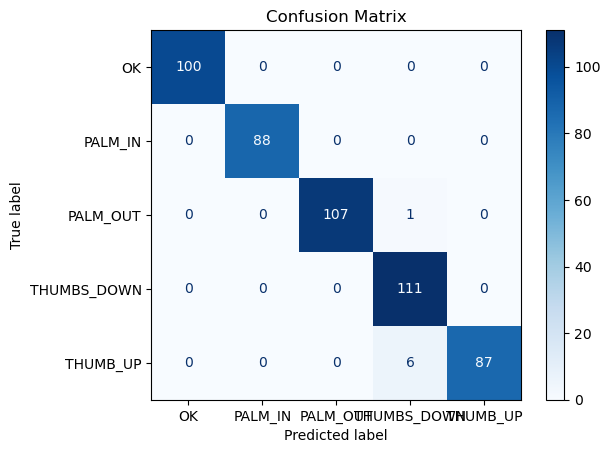

In [10]:


# Predict labels
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
ConfusionMatrixDisplay(cm, display_labels=label_encoder.classes_).plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [12]:
# Save the final model
model.save("final_gesture_action_model.keras")
print("Model saved as 'final_gesture_action_model.keras'")

Model saved as 'final_gesture_action_model.keras'
